# Σημειωματάριο τέταρτο: Ξεκινώντας την ανάλυση

Έχοντας έτοιμο το dataset με τα tweets και τα CVE IDs, κάνουμε τα πρώτα μας βήματα σε αυτό το notebook για την ανάλυση των δεδομένων μας. Ξεκινάμε προσπαθώντας να εντοπίσουμε τις **δημοφιλέστερες ευπάθειες λογισμικού στο Twitter**. Συνεχίζουμε με την δημιουργία ενός **Word Cloud** που θα μας βοηθήσει να πάρουμε μια πρώτη ιδέα για το "*τί συζητάται στο Twitter σχετικά με τις ευπάθειες λογισμικού*" και ολοκληρώνουμε αυτό το notebook αναζητώντας τα **retweets**.

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
tweets = pd.read_csv('Data/tweets/tweets_2021_with_users_matched.csv', lineterminator='\n')
vuln = pd.read_csv('Data/NVD/NVD_records_2022_downoload_at_February_2022_01-02-2022.csv', lineterminator='\n')

### Οι δημοφιλέστερες ευπάθειες

Αρχικά, εντοπίζουμε τις ευπάθειες που είναι πιο δημοφιλείς στο σύνολο από τα tweets που διαθέτουμε στο dataset μας, δηλαδή αυτές που έχουν τις περισσότερες εμφανίσεις στα tweets. Δημιουργούμε ένα ραβδόγραμμα συχνοτήτων και στη συνέχεια τις εντοπίζουμε στο DataFrame που περιέχει τα δεδομένα από την NVD για να δούμε τις πληροφορίες που έχουμε διαθέσιμες για αυτές.

Οι εργασίες ανάλυσης των δεδομένων που είναι αποθηκευμένα ως λίστες σε μια στήλη ενός DataFrame παρουσιάζουν δυσκολία καθώς η βιβλιοθήκη pandas δεν αντιμετωπίζει σαν λίστες τα αντικείμενα αυτά αλλά σαν strings. Οπότε προηγούνται κάποια βήματα που απαιτούνται πριν να μπορέσουμε να βρούμε τον αριθμό των εμφανίσεων των CVE IDs που αναφέρονται στα tweets. Για τα βήματα αυτά χρησιμοποιήθηκε κώδικας από το άρθρο [Dealing with List Values in Pandas Dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173) του Towards Data Science.

Αρχικά παρατηρούμε την μορφή που έχουν τα δεδομένα τώρα και στη συνέχεια μετατρέπουμε τα περιεχόμενα της στήλης 'matched_CVE_IDs' από str σε list. 

In [4]:
type(tweets.loc[0, 'matched_CVE_IDs'])

str

In [5]:
tweets['matched_CVE_IDs']

0         ['CVE-2021-34582']
1         ['CVE-2021-34598']
2         ['CVE-2021-39474']
3         ['CVE-2021-39474']
4         ['CVE-2021-43136']
                 ...        
199610    ['CVE-2021-28280']
199611    ['CVE-2021-27645']
199612    ['CVE-2021-27644']
199613    ['CVE-2021-27643']
199614    ['CVE-2021-25847']
Name: matched_CVE_IDs, Length: 199615, dtype: object

In [3]:
tweets['matched_CVE_IDs'] = tweets['matched_CVE_IDs'].apply(eval)

In [7]:
type(tweets.loc[0, 'matched_CVE_IDs'])

list

In [5]:
tweets['matched_CVE_IDs']

0         [CVE-2021-34582]
1         [CVE-2021-34598]
2         [CVE-2021-39474]
3         [CVE-2021-39474]
4         [CVE-2021-43136]
                ...       
199610    [CVE-2021-28280]
199611    [CVE-2021-27645]
199612    [CVE-2021-27644]
199613    [CVE-2021-27643]
199614    [CVE-2021-25847]
Name: matched_CVE_IDs, Length: 199615, dtype: object

Κρατάμε πρώτα σε μια νέα στήλη τον αριθμό των CVEs που αναφέρονται σε κάθε tweet.

In [8]:
tweets['number_of_CVEs'] = tweets['matched_CVE_IDs'].apply(lambda cves: len(cves))

In [11]:
tweets[tweets['number_of_CVEs']>1]

,id,text,matched_CVE_IDs,created_at,retweet_count,reply_count,like_count,quote_count,author_id,author_name,author_username,author_description,author_followers_count,author_following_count,author_tweet_count,author_listed_count,number_of_CVEs
8,1458426201907683328,IT Risk:\nRed Hat.Multiple vulnerabilities in ...,"[CVE-2021-33200, CVE-2021-31916]",2021-11-10T13:27:57.000Z,0,1,0,0,1345711683147186177,Sun_up Risk_management,management_sun,シス管不在企業を応援するリスクマージメント系情報提供サービスを運営しています。\n#フリーラ...,50,79,4265,3,2
9,1458425820234412040,IT Risk:\nRed Hat.kernel-rtに複数の脆弱性 -1/4\nコマンドや...,"[CVE-2021-33200, CVE-2021-31916, CVE-2021-31829]",2021-11-10T13:26:26.000Z,0,1,0,0,1345711683147186177,Sun_up Risk_management,management_sun,シス管不在企業を応援するリスクマージメント系情報提供サービスを運営しています。\n#フリーラ...,50,79,4265,3,3
28,1458422888285892610,IT Risk:\nRed Hat.Vulnerability in resource-ag...,"[CVE-2021-27291, CVE-2021-20270]",2021-11-10T13:14:47.000Z,0,0,0,0,1345711683147186177,Sun_up Risk_management,management_sun,シス管不在企業を応援するリスクマージメント系情報提供サービスを運営しています。\n#フリーラ...,50,79,4265,3,2
29,1458422813933539331,IT Risk:\nRed Hat.resource-agentsに脆弱性\nサービス拒否状...,"[CVE-2021-27291, CVE-2021-20270]",2021-11-10T13:14:29.000Z,0,0,0,0,1345711683147186177,Sun_up Risk_management,management_sun,シス管不在企業を応援するリスクマージメント系情報提供サービスを運営しています。\n#フリーラ...,50,79,4265,3,2
30,1458422355311480836,IT Risk:\nRed Hat.Multiple vulnerabilities in ...,"[CVE-2021-35564, CVE-2021-35603, CVE-2021-3558...",2021-11-10T13:12:40.000Z,0,1,0,0,1345711683147186177,Sun_up Risk_management,management_sun,シス管不在企業を応援するリスクマージメント系情報提供サービスを運営しています。\n#フリーラ...,50,79,4265,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198903,1348681140282994691,Sudo 1.9.5 is available which fixes several bu...,"[CVE-2021-23240, CVE-2021-23239]",2021-01-11T17:20:15.000Z,4,0,6,0,1173666704481648640,Sudo Project,SudoProject,NaN,258,1,61,6,2
199002,1347829659363381249,🔴GOOGLE🔴\nMúltiples vulnerabilidades de severi...,"[CVE-2021-22493, CVE-2021-22492]",2021-01-09T08:56:46.000Z,1,0,0,0,1128305615028269056,Grupo ICA CERT | Ciberseguridad,GrupoICA_Ciber,Unidad de Negocio de #ciberseguridad de @Grupo...,162,32,2293,2,2
199222,1347483443232448512,The most important of these use-after-free iss...,"[CVE-2021-21107, CVE-2021-21108, CVE-2021-21106]",2021-01-08T10:01:02.000Z,0,0,0,0,1238118683899301889,Roman Olejnikov,ROlejnikov,NaN,15,43,3407,1,3
199223,1347477420119629824,The most important of these use-after-free iss...,"[CVE-2021-21107, CVE-2021-21108, CVE-2021-21106]",2021-01-08T09:37:06.000Z,0,0,0,0,1306723445263212544,CyberNews,CyberNe79425560,Cyber news is daily IT news digest,16,0,5826,1,3


Στην συνέχεια ορίζουμε την συνάρτηση *to_1D(series)* η οποία δέχεται ένα αντικείμενο Series με λίστες και επιστρέφει ένα Series με τα αντικείμενα που υπάρχουν στις λίστες αυτές...

In [9]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

...έτσι ώστε στη συνέχεια να μπορέσουμε να χρησιμοποίησουμε την value_counts() για να βρούμε τον αριθμό των εμφανίσεων των CVE IDs...

In [10]:
top_cves = to_1D(tweets['matched_CVE_IDs']).value_counts()

...και να μπορέσουμε να εμφανίσουμε το ραβδόγραμμα συχνοτήτων.

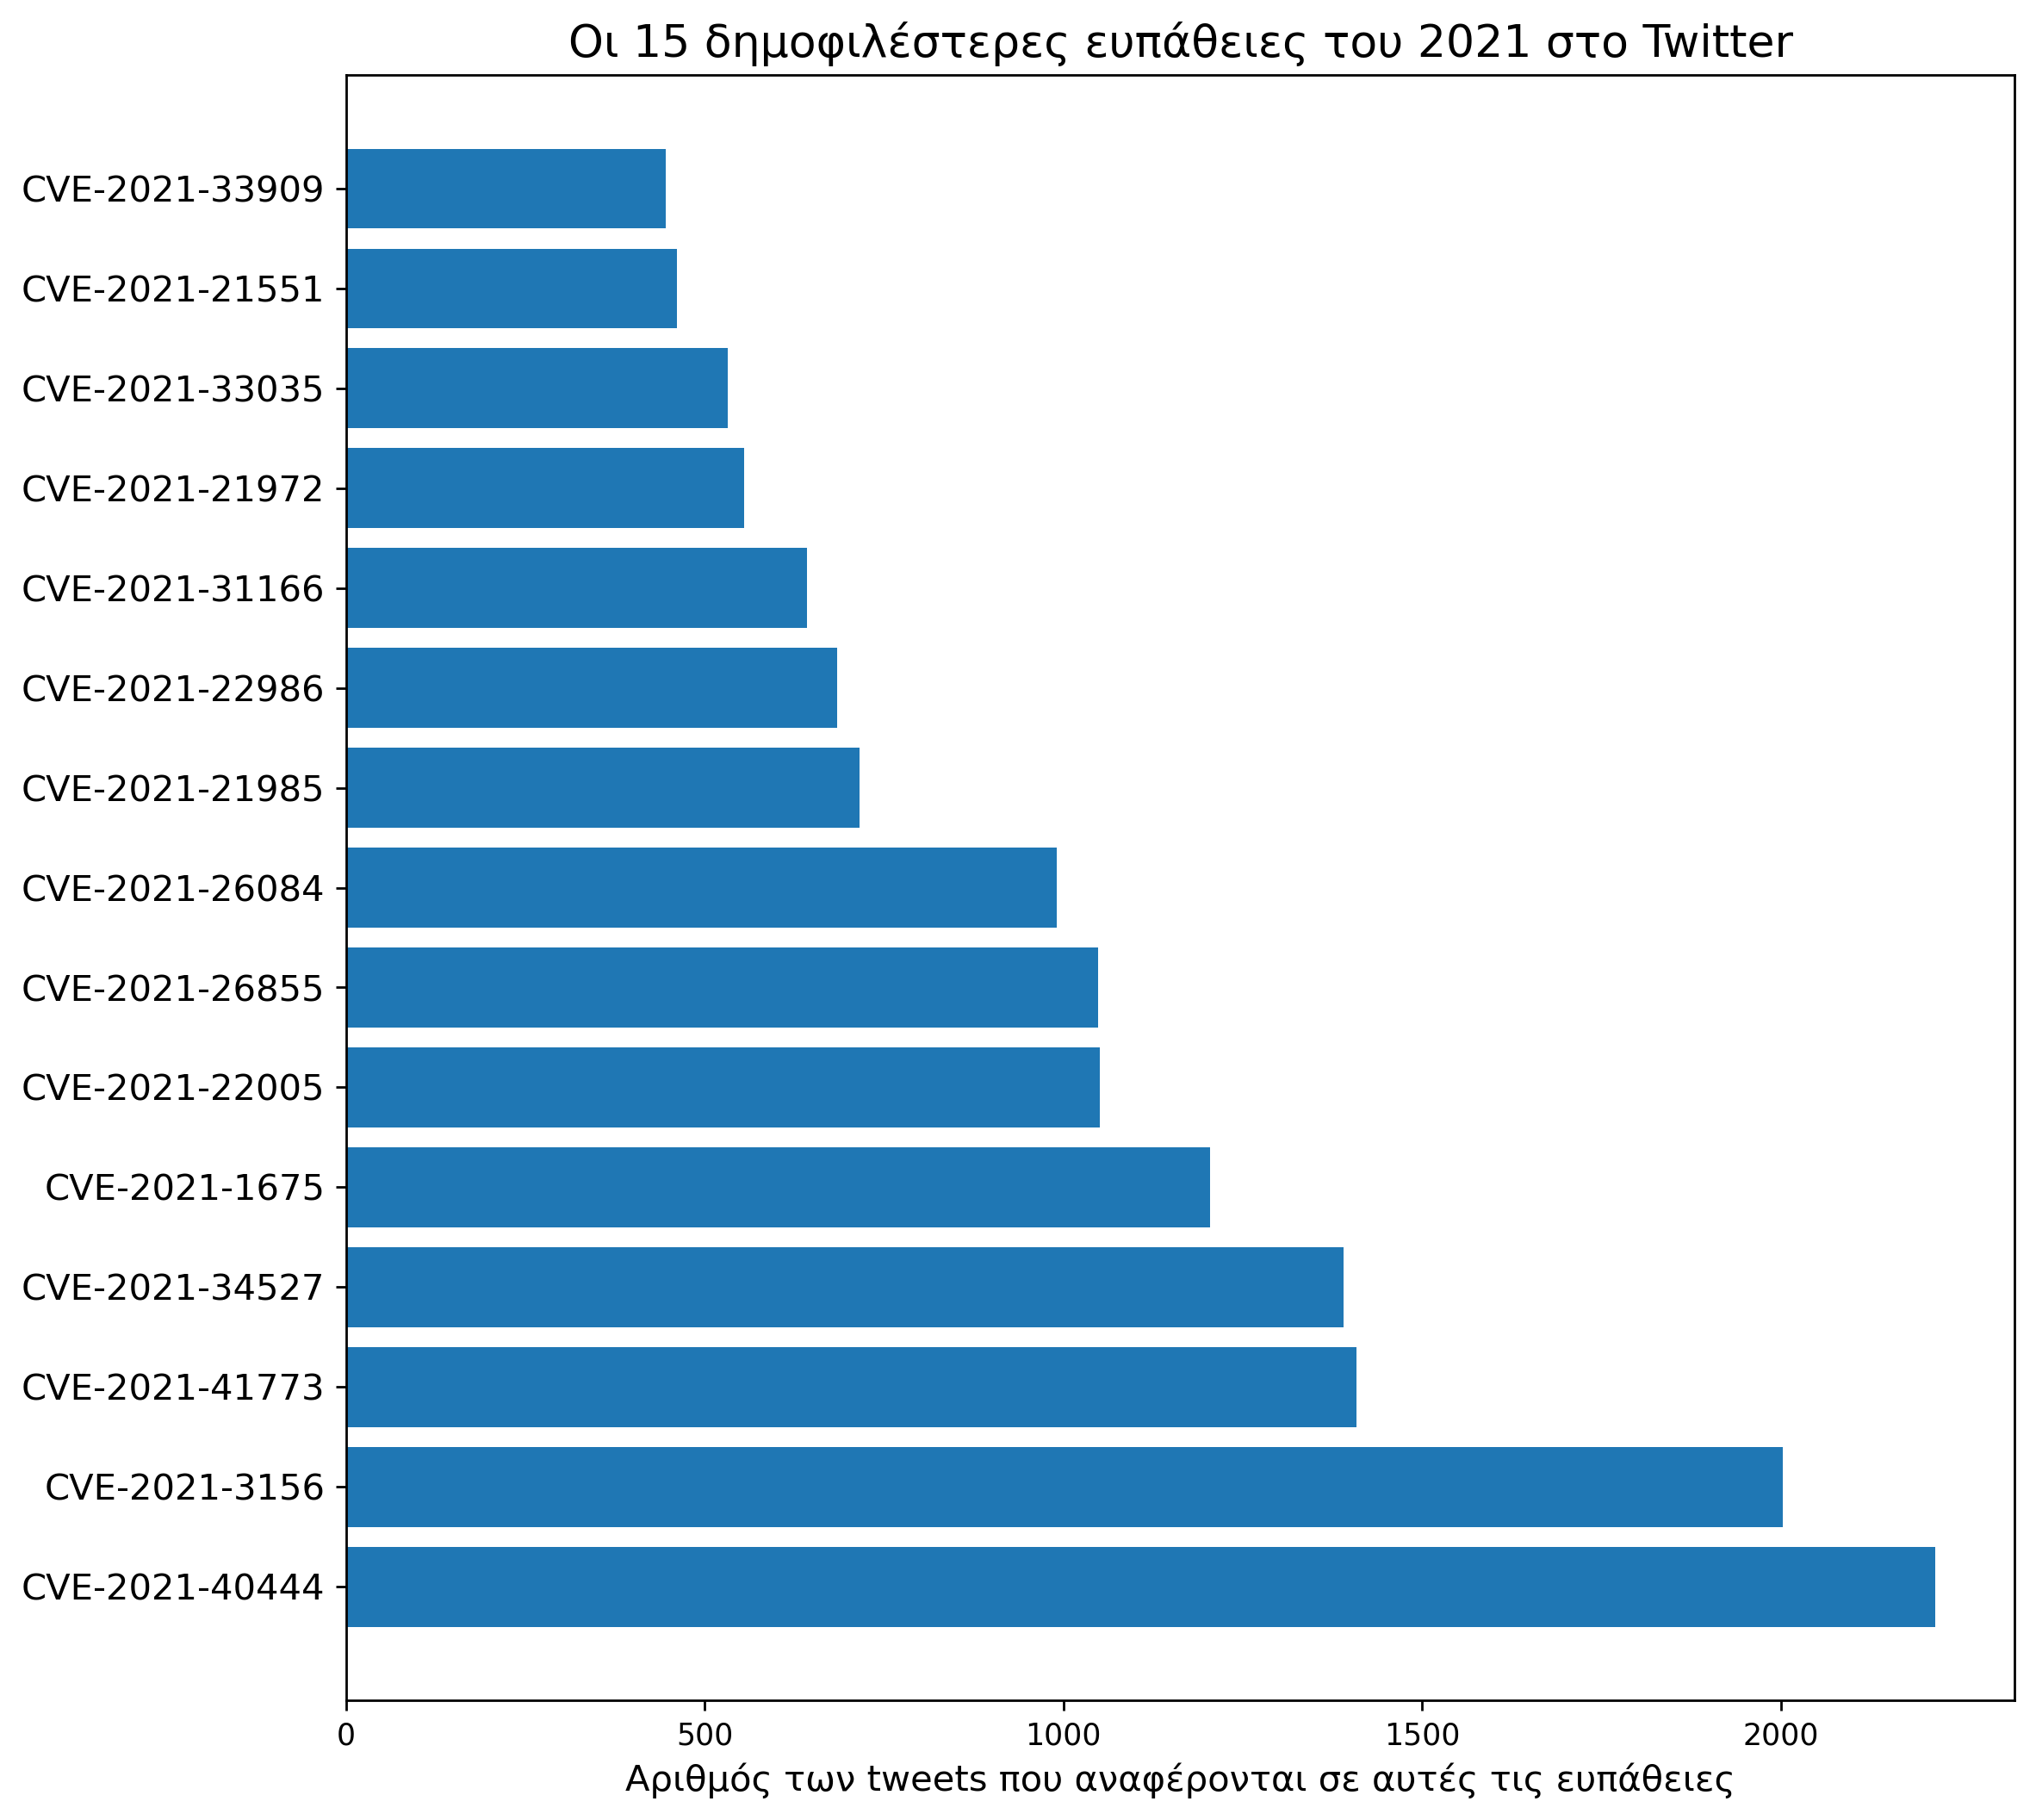

In [11]:
# Κρατάμε στην λίστα top15cve_ids τα CVE IDs των 15 δημοφιλέστερων ευπαθειών και στην top15cve_freqs τον αριθμό 
# εμφανίσεών τους.
top15cve_ids = list(top_cves[0:15].index)
top15cve_freqs = list(top_cves[0:15].values)

# Δημιουργία του οριζόντιου ραβδογράμματος συχνοτήτων
fig = plt.figure(dpi=250, figsize=(10, 10))
plt.barh(top15cve_ids, top15cve_freqs)
plt.xlabel("Αριθμός των tweets που αναφέρονται σε αυτές τις ευπάθειες", fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Οι 15 δημοφιλέστερες ευπάθειες του 2021 στο Twitter", fontsize = 15);

Στην συνέχεια εντοπίζουμε και εμφανίζουμε τις εγγραφές των ευπαθειών αυτών από το NVD DataFrame μας για να δούμε σε τις πληροφορίες τους.

In [12]:
# Από: https://kanoki.org/2019/03/27/pandas-select-rows-by-condition-and-string-operations/
topCVEs = vuln[vuln.cve_id.str.contains('|'.join(list(top_cves[0:15].index)))]

# Με τον παραπάνω τρόπο θα επιστραφούν εκτός από αυτές τις 15 και 2 επιπλέον επειδή εμφανίζουμε
# κάθε NVD εγγραφή της οποίας το ID ταιριάζει στο string pattern των 15 δημοφιλέστερων IDs. Έτσι,
# μαζί παίρνουμε και τις εγγραφές για τα CVE-2021-31562 και CVE-2021-31567 γιατί ενώ δεν είναι 
# στις 15 δημοφιλέστερες ευπάθειες, ως αλφαριθμητικά περιλαμβάνουν το 'CVE-2021-3156' που είναι ένα
# από τα IDs των δημοφιλέστερων ευπαθειών. Οπότε τις διαγράφουμε.
topCVEs = topCVEs.drop(labels=[9849, 9850])
topCVEs

,cve_id,assigner,CWEs,number_of_references,description,vendors,attackVector,attackComplexity,privilegesRequired,userInteraction,scope,confidentialityImpact,integrityImpact,availabilityImpact,CVSS_baseScore,CVSS_baseSeverity,exploitabilityScore,impactScore
1276,CVE-2021-1675,secure@microsoft.com,['CWE-269'],4,Windows Print Spooler Elevation of Privilege V...,['microsoft'],NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,8.8,HIGH,2.8,5.9
2981,CVE-2021-21551,secure@dell.com,['CWE-863'],3,Dell dbutil_2_3.sys driver contains an insuffi...,['dell'],LOCAL,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9
3374,CVE-2021-21972,security@vmware.com,['CWE-269'],4,The vSphere Client (HTML5) contains a remote c...,['vmware'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
3387,CVE-2021-21985,security@vmware.com,['CWE-20'],3,The vSphere Client (HTML5) contains a remote c...,['vmware'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
3409,CVE-2021-22005,security@vmware.com,['CWE-434'],2,The vCenter Server contains an arbitrary file ...,['vmware'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
4211,CVE-2021-22986,f5sirt@f5.com,['NVD-CWE-noinfo'],3,"On BIG-IP versions 16.0.x before 16.0.1.1, 15....",['f5'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
6344,CVE-2021-26084,security@atlassian.com,['CWE-74'],3,In affected versions of Confluence Server and ...,['atlassian'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
6635,CVE-2021-26855,secure@microsoft.com,['NVD-CWE-noinfo'],5,Microsoft Exchange Server Remote Code Executio...,['microsoft'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
9535,CVE-2021-31166,secure@microsoft.com,['CWE-416'],2,HTTP Protocol Stack Remote Code Execution Vuln...,['microsoft'],NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9
9848,CVE-2021-3156,cve@mitre.org,['CWE-193'],28,Sudo before 1.9.5p2 contains an off-by-one err...,"['mcafee', 'fedoraproject', 'netapp', 'sudo_pr...",LOCAL,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9


### Δημιουργία Word Cloud

Στη συνέχεια εμφανίζουμε ένα Word Cloud που δημιουργείται από το σύνολο των tweets. Για τον σχηματισμό του text με βάση το οποίο σχηματίζεται το Word Cloud αφαιρούμε το 'cve' και το 'id' μαζί με τα έτοιμα Stopwords. 

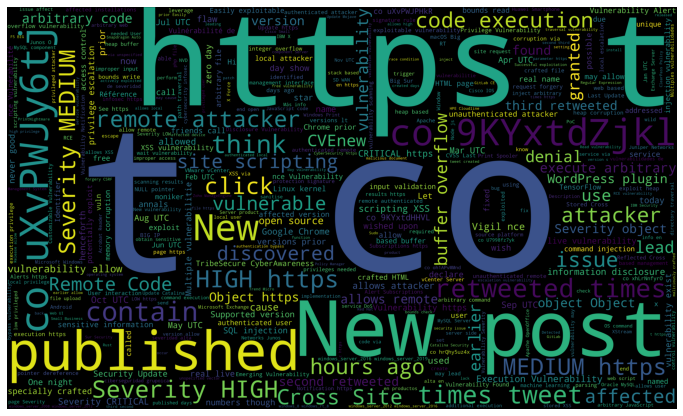

In [13]:
my_stopwords = set(STOPWORDS)
my_stopwords.add('cve')
my_stopwords.add('id')

text = ""

for tweet in list(tweets['text']):    
    tokens = tweet.split()    
    text += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 5000,
                      height = 3000,
                      max_words=400,
                      random_state=2,
                      stopwords = my_stopwords).generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Κατά την δοκιμή και εμφάνιση αρκετών Word Clouds όπως αυτό παραπάνω, παρατηρήθηκε ότι υπάρχουν αλφαριθμητικά που **φαινομενικά δεν έχουν κάποια σημασία**, όπως για παράδειγμα το '9KYxtdZjkl'. 

Το αναζητούμε στο dataset και παρατηρούμε ότι πρόκειται για μέρος από υπερσύνδεσμο. Αν δοκιμάσουμε να εμφανίσουμε τα tweets που περιέχουν αυτό αλλά και τα tweets που περιέχουν τα υπόλοιπα "περίεργα" αλφαριθμητικά ίσως οδηγηθούμε σε κάποια **χρήσιμα συμπεράσματα** που μπορούν να μας βοηθήσουν στην έρευνά μας, όπως δημοφιλείς ιστοτόπους (εκτός από δημοφιλείς users και ευπάθειες) σχετικούς με τον τομέα της ασφάλειας των υπολογιστικών συστημάτων.

In [14]:
# Είναι μάλιστα τόσα πολλά που βάζουμε ένα όριο στην εμφάνιση γιατί αλλιώς "υπερφορτώνουμε" το Jupyter και τον
# υπολογιστή μας. Ο μετρητής j χρησιμοποιείται για αυτό τον σκοπό ενώ ο i για να μπορούμε να εμφανίσουμε ολόκληρη
# την εγγραφή του tweet που εντοπίσαμε από το DataFrame.
i = 0
j= 0
for tweet in list(tweets['text']):
    i = i + 1
    
    if '9KYxtdZjkl' in tweet:
        j = j + 1
        
        if j < 5:
            print(tweets.loc[i])

id                                                      1458427984210284552
text                      New post from https://t.co/uXvPWJy6tj (CVE-202...
matched_CVE_IDs                                            [CVE-2021-43136]
created_at                                         2021-11-10T13:35:02.000Z
retweet_count                                                             0
reply_count                                                               0
like_count                                                                0
quote_count                                                               0
author_id                                                955014888446939136
author_name                                                  Wolfgang Sesin
author_username                                               WolfgangSesin
author_description        Check Point Master & Instructor, Pentest Exper...
author_followers_count                                                  292
author_follo

In [15]:
print("Συνολικά", j, "tweets περιέχουν αυτόν τον υπερσύνδεσμο!")

Συνολικά 24942 tweets περιέχουν αυτόν τον υπερσύνδεσμο!


Και από ότι φαίνεται αυτόν τον σύνδεσμο τον συναντάμε στον λογαριασμό του ιστοτόπου www.sesin.at

In [16]:
tweets.loc[tweets['author_id'] == 958005194398289920].head(1)

,id,text,matched_CVE_IDs,created_at,retweet_count,reply_count,like_count,quote_count,author_id,author_name,author_username,author_description,author_followers_count,author_following_count,author_tweet_count,author_listed_count
3,1458427985753776138,New post from https://t.co/9KYxtdZjkl (CVE-202...,[CVE-2021-39474],2021-11-10T13:35:02.000Z,0,0,0,0,958005194398289920,www.sesin.at,www_sesin_at,for more information about us please visit htt...,88,0,212995,0


In [17]:
i = 0
sesin_tweets = tweets.loc[tweets['author_id'] == 958005194398289920]
sesin_texts = list(sesin_tweets['text'])
for text in sesin_texts:
    if '9KYxtdZjkl' in text:
        i = i + 1
if i == 24942:
    print("Και τα 24942 tweets που περιέχουν αυτό τον σύδεσμο ανήκουν στον λογαριασμό του www.sesin.at")

Και τα 24942 tweets που περιέχουν αυτό τον σύδεσμο ανήκουν στον λογαριασμό του www.sesin.at


In [18]:
sesin_tweets.sort_values(['retweet_count', 'like_count'], ascending=False).head(3)

,id,text,matched_CVE_IDs,created_at,retweet_count,reply_count,like_count,quote_count,author_id,author_name,author_username,author_description,author_followers_count,author_following_count,author_tweet_count,author_listed_count
9451,1455072172788142081,New post from https://t.co/9KYxtdZjkl (Cisco A...,[CVE-2021-40125],2021-11-01T07:20:14.000Z,1,0,1,0,958005194398289920,www.sesin.at,www_sesin_at,for more information about us please visit htt...,88,0,212995,0
117962,1402699611609894913,New post from https://t.co/9KYxtdZjkl (CVE-202...,[CVE-2021-31832],2021-06-09T18:50:22.000Z,1,0,1,0,958005194398289920,www.sesin.at,www_sesin_at,for more information about us please visit htt...,88,0,212995,0
140475,1388230545436516357,New post from https://t.co/9KYxtdZjkl (CVE-202...,[CVE-2021-22205],2021-04-30T20:35:28.000Z,1,0,1,0,958005194398289920,www.sesin.at,www_sesin_at,for more information about us please visit htt...,88,0,212995,0


Αν και από ότι φαίνεται δεν είναι ένας λογαριασμός με απήχηση, είναι παρ'ολ'αυτά ένας πολύ ενεργός λογαριασμός στο Twitter από την άποψη ότι έχει κοινοποιήσει πολλά tweets. 

Με αυτό τον τρόπο μπορούμε να εντοπίσουμε κι άλλους ιστότοπους ασφαλείας ενεργούς στο Twitter αλλά και γενικότερα χρήστες που είναι ενεργοί.

Συνεχίζοντας δημιουργούμε και ένα νέο διάγραμμα, αφαιρώντας αυτή την φορά τα links από το κείμενο. Επίσης προσθέτουμε στο STOPWORDS και μερικά ακόμα αλφαριθμητικά που σχετίζονται με συνδέσμους, όπως τους εμφανίζει το Twitter ('t' και 'co').

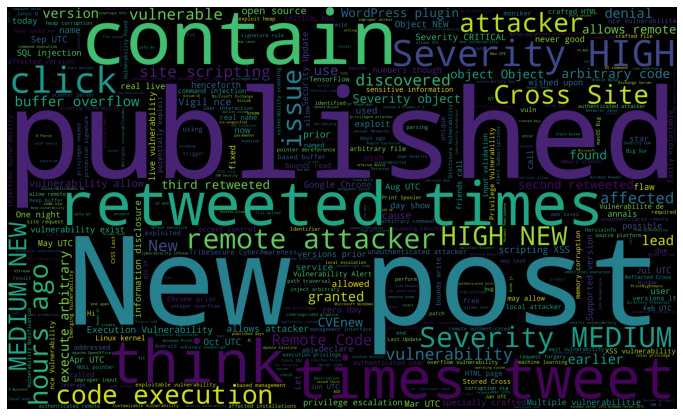

In [19]:
my_stopwords = set(STOPWORDS)
my_stopwords.add('cve')
my_stopwords.add('id')
my_stopwords.add('t')
my_stopwords.add('co')

text = ""
for tweet in list(tweets['text']):
    
    tokens = tweet.split()    
    for i in range(0, len(tokens)):
        if 'http' in tokens[i]:
            tokens[i] = ""
            
    text += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 5000,
                      height = 3000,
                      max_words=400,
                      random_state=1,
                      stopwords = my_stopwords).generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Σε αυτό το Word Cloud μπορούμε να διακρίνουμε λέξεις-κλειδιά όπως 'published', 'severity', 'high', 'retweeted', 'attacker', 'new post', 'medium', 'click' κ.ά. που έχουν να κάνουν με τα λεγόμενα **terse messages** στο πλαίσιο του Twitter και των ευπαθειών λογισμικού. Επίσης, διακρίνουμε και λέξεις-κλειδιά που σχετίζονται με το **είδος της ευπάθειας** και των exploits, όπως 'denial', 'remote code', 'privilage' και 'buffer overflow'.

### Έλεγχος για την ύπαρξη  tweets που είναι retweet

Είναι ενδιαφέρον να δούμε πόσα από τα tweets που έχουμε στο dataset είναι retweet άλλων tweets. Αναγνωρίζουμε ένα retweet επειδή το κείμενό του ξεκινάει με 'RT' (**είναι έτσι όμως;**). Αυτό το συμπαιράναμε ύστερα από πειραματισμό με το Twitter API στο περιβάλλον του Postman API tester, όπου διαπιστώθηκε ότι το Twitter API προσθέτει τους χαρακτήρες 'RT' μπροστά από το κείμενο του tweet στην περίπτωση που αυτό είναι retweet.


In [20]:
rt_count = 0
texts = list(tweets['text'])
retweets = []

for i in range(0, len(texts)):
    
    contents = texts[i].split()
    
    #Ok, υπάρχει περίπτωση το text να ξεικάει με RT και να μην είναι retweet 
    # αλλά έτσι παίρνουμε μια ιδέα...
    if contents[0] == 'RT': 
        rt_count = rt_count + 1
        retweets.append(i)
        
print("Συνολικά έχουμε ",rt_count, "retweets?")
print("Αυτό σημαίνει ότι το ποσοστό των retweets στο dataset είναι ίσο με", 100 * (rt_count/len(texts)), "%")
print("Ίσως κάτι να μην κάναμε καλά και δεν έχουμε βρει τα πραγματικά retweets.")

Συνολικά έχουμε  273 retweets?
Αυτό σημαίνει ότι το ποσοστό των retweets στο dataset είναι ίσο με 0.13676326929338978 %
Ίσως κάτι να μην κάναμε καλά και δεν έχουμε βρει τα πραγματικά retweets.


Από ότι φαίνεται το dataset μας δεν περιέχει retweets, καθώς δεν θα μπορούσε να είναι ένας τόσο μικρός αριθμός. Τα 273 που βρήκαμε δεν είναι retweets, είναι απλά tweets που ξεκινάνε με τους χαρακτήρες 'RT'.  

Με την λίστα retweets έχουμε κρατήσει τα indeces των retweets έτσι ώστε να μπορέσουμε να τα προσπελάσουμε με loc στο DataFrame. Μπορούμε να επισκεφτούμε στο Twitter μερικά από τα tweets που ανήκουν εδώ, μέσω του url: https://twitter.com/x/status/id, όπου id το  id του tweet το οποίο ψάχνουμε *(το x υποδεικνύει username όμως τοποθετώντας απλά το σωστό id, το Twitter αυτόματα εντοπίζει τον λογαριασμό που το δημοσίευσε, τοποθετεί το username του στη θέση του x και ανακατευθύνσει στην σελίδα του tweet)*. Κάνοντας αυτό για μερικά tweets θα συμπαιράνουμε ότι όντως ξεκινάνε με RT και δεν είναι retweets (στην περίπτωση του retweet το RT δεν φαίνεται στο Twitter, αλλά προστίθεται μόνο όταν το προσπελαύνουμε μέσω του  API).

In [21]:
retweets[102]

63485

In [22]:
tweets.loc[63485]

id                                                      1432553374789115906
text                      RT trip_elix: "Unauthenticated attackers could...
matched_CVE_IDs                                            [CVE-2021-33766]
created_at                                         2021-08-31T03:58:34.000Z
retweet_count                                                             0
reply_count                                                               0
like_count                                                                0
quote_count                                                               0
author_id                                                        1325414028
author_name                          Daniel Villamizar -Microsoft Azure MVP
author_username                                             CSA_DVillamizar
author_description        MVP, MCSD:Microsoft Azure Architect, MCSE: Clo...
author_followers_count                                                 1309
author_follo

Όταν έγινε η κλήση προς το Twitter API από ότι φαίνεται αποκλείσαμε την λήψη των retweets με την παράμετρο *-isa: retweet* στο API reuest μας, κι αυτό έγινε για να περιορίσουμε το μέγεθος του dataset. Αν είχαμε και retweets, τότε θα είχαμε εκθετικά μεγαλύτερο αριθμό tweets στο dataset. Οπότε σχετικά με τα retweets, αρκούμαστε με την πληροφορία που έχουμε για κάθε tweet: τον αριθμό των φορών που αυτό έχει γίνει retweet.

### Συμπεράσματα

Σε αυτό το notebook ξεκινήσαμε με την ανάλυση των δεδομένων τα οποία συλλέξαμε στα προηγούμενα. 

Εντοπίσαμε αρχικά τις ευπάθειες εκείνες που συζητήθηκαν περισσότερο στο Twitter κατά το 2021, κάτι το οποίο μας δίνει έναυσμα για την πορεία της έρευνάς μας σχετικά με την δημοτικότητα των ευπαθειών λογισμικού σε αυτό το κοινωνικό μέσο. Θα μπορούσαμε δηλαδή στη συνέχεια να αναλύσουμε για παράδειγμα τα tweets που αναφέρονται σε αυτές τις ευπάθειες ή τις εταιρίες λογισμικού που σχετίζονται με αυτές. Ή να ασχοληθούμε και με τις ευπάθειες αυτές καθ'εαυτές για να δούμε λεπτομερέστερα τα χαρακτηριστικά που τις έδωσαν αυτή την δημοτικότητα και που τις ξεχωρίζουν από τις υπόλοιπες ευπάθειες του έτους. 

Με την δημιουργία του Word Cloud αποκτήσαμε μια πρώτη άποψη για το context των δημοσιεύσεων που αναφέρονται στις ευπάθειες λογισμικού. Από το πρώτο διάγραμμα εντοπίσαμε ότι υπάρχουν στα tweets κάποιοι υπερσύνδεσμοι που επαναλαμβάνονται. Διαπιστώσαμε ότι μπορούμε να βρούμε με αυτό τον τρόπο ιστοτόπους που αναφέρονται συχνά στα tweets  και είναι σχετικοί με τον τομέα του cyber security (εκτός από τους λογαριασμούς χρηστών για τους οποίους έχουμε κρατήσει ήδη ξεχωριστό αρχείο δεδομένων). Αυτό από μόνο του δεν δίνει κάποια γνώση, όμως μας δίνει ιδέες για την συνέχεια της πορείας μας που αν κριθεί ότι αξίζουν τον χρόνο και την ενασχόληση, μπορούν να υλοποιηθούν στο μέλλον. Για παράδειγμα θα μπορούσαμε με regular expressions να ξεχωρίσουμε τους υπερσυνδέσμους που υπάρχουν σε κάθε tweet και να εντοπίσουμε αυτούς που επαναλαμβάνονται περισσότερο.

Τέλος, προσπαθήσαμε να ξεχωρίσουμε τα retweets από το dataset μας και να τα μετρήσουμε. Οδηγηθήκαμε όμως στο συμπέρασμα ότι δεν υπήρχαν retweets στο σύνολο των tweets που μας επέστρεψε το Twitter API, οπότε μπορούμε να ασχοληθούμε σχετικά με τα retweets μόνο μέσω της στήλης *retweet_count*  του tweets DataFrame, που υποδυκνύει το πόσες φορές ανακοινοποιήθηκε το κάθε tweet.